#https://www.kaggle.com/rajmehra03/intro-to-parameter-tuning-in-scikit-acc-0-9175

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from google.colab import files
uploaded = files.upload()

Saving winequality.csv to winequality (2).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [0]:
df.shape

(6497, 16)

In [0]:
df.columns # the Flavors (Grade) is the target variable that we have to predict.

Index(['Tartaric acid concentration (g/dm3)',
       'Acetic acid concentration (g/dm3)',
       'Citric acid concentration (g/dm3)',
       'Residual sugar concentration (g/dm3)',
       'Sodium chloride concentration (g/dm3)',
       'Free sulfite concentration (mg/dm3)',
       'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 'pH',
       'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)',
       'Flavors (Grade)', 'Flavors (Rating)', 'Type', 'Producer Name',
       'producer code'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
Tartaric acid concentration (g/dm3)        6497 non-null float64
Acetic acid concentration (g/dm3)          6497 non-null float64
Citric acid concentration (g/dm3)          6497 non-null float64
Residual sugar concentration (g/dm3)       6497 non-null float64
Sodium chloride concentration (g/dm3)      6497 non-null float64
Free sulfite concentration (mg/dm3)        6497 non-null float64
Total sulfite concentration (mg/dm3)       6497 non-null float64
Density (g/dm3)                            6497 non-null float64
pH                                         6497 non-null float64
Potassium sulfate concentration (g/dm3)    6497 non-null float64
Alcohol content (% vol.)                   6497 non-null float64
Flavors (Grade)                            6497 non-null int64
Flavors (Rating)                           6497 non-null object
Type                                       6497 non

In [0]:
df.isnull().sum() # no null or Nan values.

Tartaric acid concentration (g/dm3)        0
Acetic acid concentration (g/dm3)          0
Citric acid concentration (g/dm3)          0
Residual sugar concentration (g/dm3)       0
Sodium chloride concentration (g/dm3)      0
Free sulfite concentration (mg/dm3)        0
Total sulfite concentration (mg/dm3)       0
Density (g/dm3)                            0
pH                                         0
Potassium sulfate concentration (g/dm3)    0
Alcohol content (% vol.)                   0
Flavors (Grade)                            0
Flavors (Rating)                           0
Type                                       0
Producer Name                              0
producer code                              0
dtype: int64

In [0]:
#fixed acidity.
df1 = df[['Tartaric acid concentration (g/dm3)', 'Acetic acid concentration (g/dm3)', 'Citric acid concentration (g/dm3)', 
          'Residual sugar concentration (g/dm3)', 'Sodium chloride concentration (g/dm3)', 'Free sulfite concentration (mg/dm3)', 
          'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 
          'pH', 'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)', 'Flavors (Grade)']]
df1.rename(columns={'Flavors (Grade)':'Flavors_Grade'}, inplace=True)
df_red = df1.iloc[0:1599]
#sns.factorplot(data=df1,kind='box',size=15,aspect=3) # the values are distributed over a very small scale.

In [0]:
df_white = df1.iloc[1600:6497]
print(df_red)

      Tartaric acid concentration (g/dm3)  ...  Flavors_Grade
0                                     7.4  ...              5
1                                     7.8  ...              5
2                                     7.8  ...              5
3                                    11.2  ...              6
4                                     7.4  ...              5
...                                   ...  ...            ...
1594                                  6.2  ...              5
1595                                  5.9  ...              6
1596                                  6.3  ...              6
1597                                  5.9  ...              5
1598                                  6.0  ...              6

[1599 rows x 12 columns]


Modelling Algorithms

In [0]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']

'''
Flavors = []
for i in df_red['Flavors_Grade']:
    if i >= 1 and i <= 6.5:
        Flavors.append(0)
    elif i > 6.5 and i <= 10:
        Flavors.append(1)
df_red.drop('Flavors_Grade',axis=1)
df_red['Flavors_Grade'] = Flavors
'''

"\nFlavors = []\nfor i in df_red['Flavors_Grade']:\n    if i >= 1 and i <= 6.5:\n        Flavors.append(0)\n    elif i > 6.5 and i <= 10:\n        Flavors.append(1)\ndf_red.drop('Flavors_Grade',axis=1)\ndf_red['Flavors_Grade'] = Flavors\n"

In [0]:
df_red['Flavors_Grade'] 


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Flavors_Grade, Length: 1599, dtype: int64

In [0]:
df_red['Flavors_Grade'] = pd.cut(df_red['Flavors_Grade'], bins = bins, labels = group_names)
df_red.head(10)

,Tartaric acid concentration (g/dm3),Acetic acid concentration (g/dm3),Citric acid concentration (g/dm3),Residual sugar concentration (g/dm3),Sodium chloride concentration (g/dm3),Free sulfite concentration (mg/dm3),Total sulfite concentration (mg/dm3),Density (g/dm3),pH,Potassium sulfate concentration (g/dm3),Alcohol content (% vol.),Flavors_Grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [0]:
label_quality = LabelEncoder()

In [0]:
#Bad becomes 0 and good becomes 1 
df_red['Flavors_Grade'] = label_quality.fit_transform(df_red['Flavors_Grade'])

In [0]:
df_red.head(10)

,Tartaric acid concentration (g/dm3),Acetic acid concentration (g/dm3),Citric acid concentration (g/dm3),Residual sugar concentration (g/dm3),Sodium chloride concentration (g/dm3),Free sulfite concentration (mg/dm3),Total sulfite concentration (mg/dm3),Density (g/dm3),pH,Potassium sulfate concentration (g/dm3),Alcohol content (% vol.),Flavors_Grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [0]:
features = ['Tartaric acid concentration (g/dm3)', 'Acetic acid concentration (g/dm3)', 'Citric acid concentration (g/dm3)', 
          'Residual sugar concentration (g/dm3)', 'Sodium chloride concentration (g/dm3)', 'Free sulfite concentration (mg/dm3)', 
          'Total sulfite concentration (mg/dm3)', 'Density (g/dm3)', 
          'pH', 'Potassium sulfate concentration (g/dm3)', 'Alcohol content (% vol.)'] 
target = 'Flavors_Grade'
X = df_red[features]
Y = df_red[target]

#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)


In [0]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.8666666666666667,
  0.8604166666666667,
  0.8625,
  0.8583333333333333,
  0.8666666666666667,
  0.8604166666666667,
  0.8604166666666667,
  0.84375],
 'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB']}

In [0]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.866667
1,LinearSVM,0.860417
2,rbfSVM,0.862500
3,KNearestNeighbors,0.858333
4,RandomForestClassifier,0.866667
5,DecisionTree,0.860417
6,GradientBoostingClassifier,0.860417
7,GaussianNB,0.843750


In [0]:
df_red.head(10)

,Tartaric acid concentration (g/dm3),Acetic acid concentration (g/dm3),Citric acid concentration (g/dm3),Residual sugar concentration (g/dm3),Sodium chloride concentration (g/dm3),Free sulfite concentration (mg/dm3),Total sulfite concentration (mg/dm3),Density (g/dm3),pH,Potassium sulfate concentration (g/dm3),Alcohol content (% vol.),Flavors_Grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
   

    print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)
    plt.savefig("confMat.png")

NOTE THAT THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [0]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [0]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df_red)
    scaled_df_red=scaler.transform(df_red)
    X=scaled_df_red[:,0:10]
    Y=df_red['Flavors_Grade'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [0]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.866667,0.864583,0.870833
1,LinearSVM,0.860417,0.877083,0.881250
2,rbfSVM,0.862500,0.860417,0.887500
3,KNearestNeighbors,0.858333,0.872917,0.870833
4,RandomForestClassifier,0.866667,0.891667,0.883333
5,DecisionTree,0.860417,0.872917,0.881250
6,GradientBoostingClassifier,0.860417,0.875000,0.875000
7,GaussianNB,0.843750,0.825000,0.825000


In [0]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df_red=scaler.fit_transform(df_red)
X=scaled_df_red[:,0:10]
Y=df_red['Flavors_Grade'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [0]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
clf_lr.best_params_

{'C': 10, 'penalty': 'l1'}

In [0]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8793565683646113

In [0]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.86875

Confusion matrix, without normalization
[[398  15]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       413
           1       0.56      0.28      0.38        67

    accuracy                           0.87       480
   macro avg       0.73      0.62      0.65       480
weighted avg       0.85      0.87      0.85       480



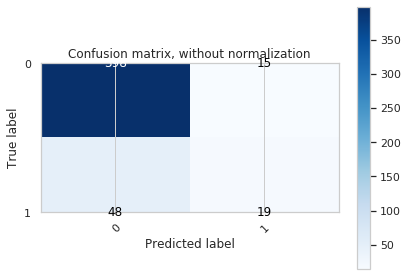

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=2))

SUPPORT VECTOR MACHINE (SVM)

In [0]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [0]:
clf.best_score_

In [0]:
clf.best_params_

In [0]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
clf_svm.best_score_

0.9106344950848972

In [0]:
clf_svm.best_params_

{'C': 1.5, 'gamma': 0.9, 'kernel': 'rbf'}

In [0]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.89375

Confusion matrix, without normalization
[[398  15]
 [ 36  31]]
              precision    recall  f1-score   support

           0   0.917051  0.963680  0.939787       413
           1   0.673913  0.462687  0.548673        67

    accuracy                       0.893750       480
   macro avg   0.795482  0.713183  0.744230       480
weighted avg   0.883113  0.893750  0.885194       480



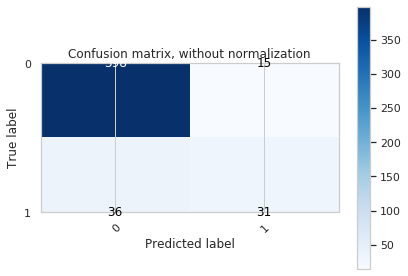

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))

RANDOM FOREST

In [0]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [0]:
clf_rf.best_params_

{'max_features': 'log2', 'n_estimators': 500}

In [0]:
clf_rf.best_score_

0.9115281501340483

In [0]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.8979166666666667

Confusion matrix, without normalization
[[402  11]
 [ 38  29]]
              precision    recall  f1-score   support

           0   0.913636  0.973366  0.942556       413
           1   0.725000  0.432836  0.542056        67

    accuracy                       0.897917       480
   macro avg   0.819318  0.703101  0.742306       480
weighted avg   0.887306  0.897917  0.886653       480



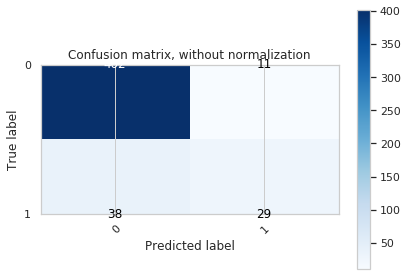

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))

GRADIENT BOOSTING

In [0]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [0]:
clf_gb.best_params_

{'n_estimators': 500}

In [0]:
clf_gb.best_score_

0.902591599642538

In [0]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.9020833333333333

Confusion matrix, without normalization
[[399  14]
 [ 33  34]]
              precision    recall  f1-score   support

           0   0.923611  0.966102  0.944379       413
           1   0.708333  0.507463  0.591304        67

    accuracy                       0.902083       480
   macro avg   0.815972  0.736782  0.767842       480
weighted avg   0.893562  0.902083  0.895095       480



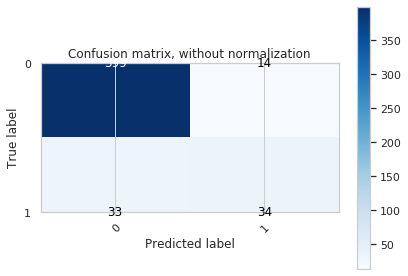

In [0]:
confMat=plot_confusion_matrix(y_test, pred, classes='Flavors (Grade)',
                      title='Confusion matrix, without normalization')
print(metrics.classification_report(y_test, pred, digits=6))